In [1]:
from pyson.utils import *
from tf_dataset import *

In [37]:
def get_generator(batch_size, 
                  db_path, 
                  text2label, 
                  img_h = 48, 
                  max_sample=-1, 
                  ABS_MAX_LENGTH=40, 
                  mode='train', 
                  shuffle=True, 
                  real_db_path=None, 
                  downsample_factor=4,
                  real_ratio=4):
    def load_db(json_paths):
        paths, labels = [], []
        for json_path in json_paths:
            root_dir = os.path.split(json_path)[0]
            path2label = read_json(json_path)
            for path, label in path2label.items():
                full_path = os.path.join(root_dir, path)
                if os.path.exists(full_path) and type(label) is str:
                    paths.append(path)
                    labels.append(str(label))
        return paths, labels
    
    
    db_paths, db_source_strs = load_db(db_path)

    print('Len of samples: ', len(db_paths))
    if real_db_path is not None:
        db_paths_real, db_source_strs_real = load_multiple_db(real_db_path)
        
    def convert_to_batch(imgs):
        shapes = np.array([img.shape[:2] for img in imgs])
        h_max, w_max = shapes[:,0].max(), shapes[:,1].max()
        w_max = max(256*4, w_max)
        pad = np.ones(shape=[len(imgs), h_max, w_max, 1])
        for i, img in enumerate(imgs):
            h, w = img.shape[:2]
            pad[i,:h,:w,0] = img
        return pad
    
    def pick_from_db(db_paths, db_source_strs):
        print('PICK:', len(db_paths), len(db_source_strs))
        idx = np.random.choice(len(db_paths))
        path = db_paths[idx]
        s = str(db_source_strs[idx])
        if len(s) < MAX_STRING_LENGTH:
            img = read_process(path)
        else:
            return pick_from_db(db_paths, db_source_strs)
        return img, s, path
    def source2label(source):
        label = np.ones([ABS_MAX_LENGTH])*-1
        source = normalize_text(source)
        assert len(source) < len(label), '{}<{}'.format(len(source), len(label))
        for i, s in enumerate(source):
            if s in text2label.keys():
                label[i] = text2label[s]
            else:
                label[i] = text2label[' ']
        return label, len(source)
    if mode == 'train':
        while True:
            input_path = []
            X_data = []
            source_str = []
            
            while len(X_data) < batch_size:
                chance = np.random.uniform() < real_ratio
                if real_db_path is not None and chance:
                    img, s, path = pick_from_db(db_paths_real, db_source_strs_real)
                else:
                    img, s, path = pick_from_db(db_paths, db_source_strs)
                X_data.append(img)
                show(img)
                print(s)
                source_str.append(str(s))
                print(path)
                print('-'*20)

                input_path.append(path)
                
            labels = np.ones([batch_size, ABS_MAX_LENGTH]) * -1
            input_length = np.zeros([batch_size, 1])
            label_length = np.zeros([batch_size, 1])
                
            X_data = convert_to_batch(X_data)
            batch_img_w = X_data.shape[2]
            i = 0 
            for i in range(len(X_data)):
                lbl_i, lbl_len_i = source2label(source_str[i])
                labels[i, :] = lbl_i
                label_length[i] = lbl_len_i
                input_length[i] = int(batch_img_w // downsample_factor) - 1

            inputs = {
                "the_input": X_data,
                "the_labels": labels,
                "input_length": input_length,
                "label_length": label_length,
                "source_str": source_str,  # used for evaluation only
                "input_path":input_path
            }

            outputs = {
                "ctc": np.zeros([batch_size])
            }
            
            yield inputs, outputs

Found 4 files json
Checking database: 0.98 %vocab: 1017
INFO: create new text2label
Len of samples:  4198
Checking database: 0.98 %PICK: 4198 4198


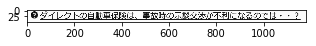

無保険車傷害特約（１名につき）
../../../DATASET/real_data/ff_data_rnd_1/10_table1_cell131_line265.png
--------------------
PICK: 4198 4198


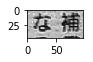

な補
../../../DATASET/real_data/ff_data_rnd_2/25_table1_cell16_line107.png
--------------------
PICK: 4198 4198


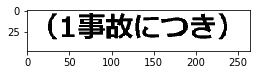

（1事故につき）
../../../DATASET/real_data/ff_data_rnd_2/21_table1_cell58_line77.png
--------------------
PICK: 4198 4198


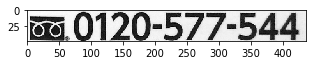

お見積り条件の設定
../../../DATASET/real_data/ff_data_rnd_1/1_text_line113.png
--------------------
PICK: 4198 4198


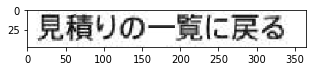

見積りのー覧に戻る
../../../DATASET/real_data/ff_data_rnd_2/10_table1_cell139_line287.png
--------------------
PICK: 4198 4198


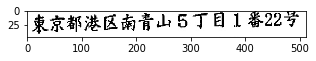

東京都港区南青山5丁目1番22号
../../../DATASET/real_data/special_font/19_ID4-1.png
--------------------
PICK: 4198 4198


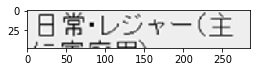

日常・レジャー(主）
../../../DATASET/real_data/ff_data_rnd_2/3_table1_cell18_line35.png
--------------------
PICK: 4198 4198


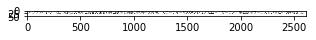

平成29年9月2日
../../../DATASET/real_data/ff_data_rnd_1/3_table1_cell39_line75.png
--------------------


In [38]:
jp = lambda *args: os.path.join(*args)

DATASET_PATH = '../../../DATASET'
# db_paths = get_paths('{}/synthetic_poc/*'.format(DATASET_PATH), 'json')

real_db_paths = get_paths(jp(DATASET_PATH, 'real_data/*/'), 'json')
paths_real, labels_real = load_multiple_db(real_db_paths)

vocabs = set()
for sentence in labels_real:
    for word in sentence:
        vocabs.add(word)
print('vocab:', len(vocabs))
print('INFO: create new text2label')
text2label = {text: label for label, text in enumerate(vocabs)}

generator = get_generator(8, real_db_paths, text2label,
                          real_db_path=real_db_paths, ABS_MAX_LENGTH=40,
                           downsample_factor=4)

a, b = next(generator)
# plot_images(a['the_input'][...,0], mxn=[8,1])
# for _ in a['source_str']:print(_)

Checking database: 0.98 %

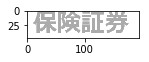

保険証券
**********************


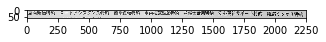

車両新価特約　ロードアシスタンス特約　他車運転特約　車両積載動産特約　弁護士費用特約　安心更新サポート特約　継続うっかり特約
**********************


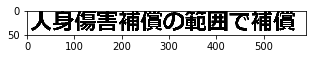

人身傷害補償の範囲で補償
**********************


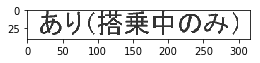

あり（搭乗中のみ）
**********************


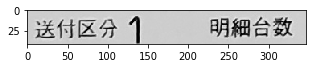

送付区分1明細台数
**********************


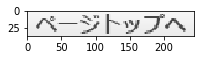

ページトップへ
**********************


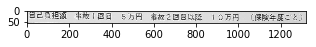

自己負担額事故１回目５万円事故２回目以降１０万円保険年度ごと）
**********************


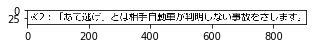

※２：「あて逃げ」とは相手自動車が判明しない事故をさします。
**********************


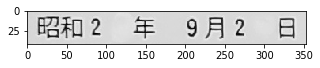

昭和2年9月2日
**********************


In [34]:
paths, labels = load_multiple_db(real_db_paths)
for p, l in zip(paths[:9], labels[:9]):
    show(p)
    print(l)
    print('*'*22)

In [5]:
def convert_number_text(number):
    rv = []
    for l  in number:
        rv.append(''.join([label2text[_] for _ in l]))
    return rv

In [6]:
convert_number_text(a['the_labels'])

NameError: name 'label2text' is not defined